In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Get dataset:-

In [2]:
df=pd.read_excel(r"C:\Users\sony\Downloads\Customer_retention_dataset-\customer_retention_dataset.xlsx")

In [3]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


# EDA:-

In [4]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [5]:
df.tail()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in
268,Female,41-50 yaers,Ghaziabad,201009,2-3 years,31-40 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in


In [6]:
df.shape

(269, 71)

In [7]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [8]:
df.nunique()

1Gender of respondent                                                    2
2 How old are you?                                                       5
3 Which city do you shop online from?                                   11
4 What is the Pin Code of where you shop online from?                   39
5 Since How Long You are Shopping Online ?                               5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [10]:
city= df['3 Which city do you shop online from?']

In [11]:
city

0              Delhi
1              Delhi
2      Greater Noida
3            Karnal 
4         Bangalore 
           ...      
264            Solan
265        Ghaziabad
266       Bangalore 
267            Solan
268        Ghaziabad
Name: 3 Which city do you shop online from?, Length: 269, dtype: object

In [12]:
city.unique()

array(['Delhi', 'Greater Noida', 'Karnal ', 'Bangalore ', 'Noida',
       'Solan', 'Moradabad', 'Gurgaon ', 'Merrut', 'Ghaziabad',
       'Bulandshahr'], dtype=object)

In [13]:
df.describe

<bound method NDFrame.describe of     1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265              

In [14]:
df.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


# checcking null Values:-

In [15]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [16]:
df.isnull()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [18]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

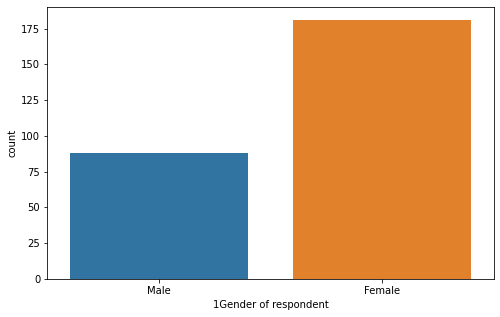

In [19]:
plt.figure(figsize=(8,5))
sns.countplot("1Gender of respondent", data=df)

As we can see around 175 females are doing online shopig where as male are around 80-90

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

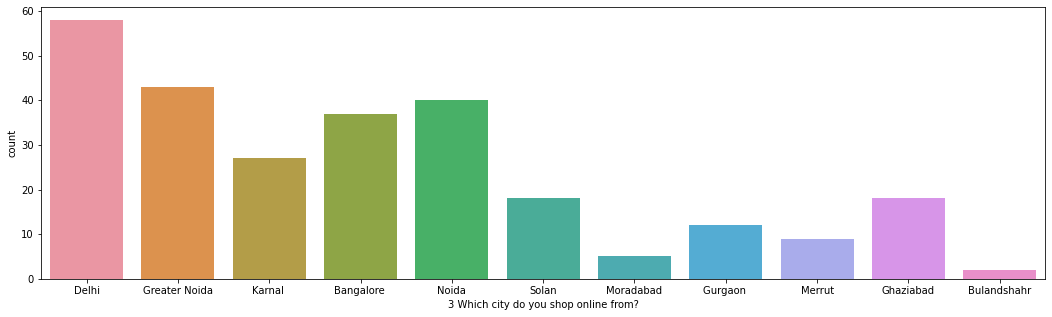

In [20]:
plt.figure(figsize=(18,5))
sns.countplot("3 Which city do you shop online from?", data=df)

<AxesSubplot:>

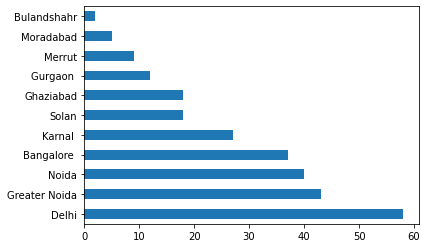

In [21]:
df['3 Which city do you shop online from?'].value_counts().plot(kind='barh')

<AxesSubplot:>

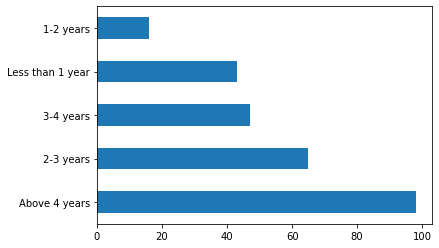

In [22]:
df['5 Since How Long You are Shopping Online ?'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='5 Since How Long You are Shopping Online ?', ylabel='count'>

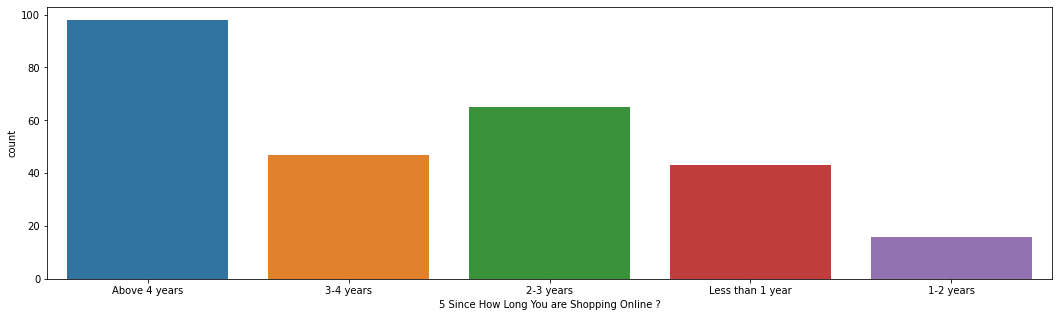

In [23]:
plt.figure(figsize=(18,5))
sns.countplot("5 Since How Long You are Shopping Online ?", data=df)

from above we can see most customers are shoping above 4yrs

<AxesSubplot:>

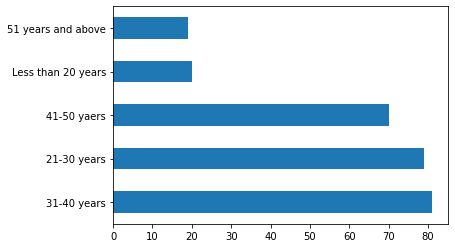

In [54]:
df['2 How old are you? '].value_counts().plot(kind='barh')

as we can see 20-40 years old people mostly shoping from ecommere sites

<AxesSubplot:xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='count'>

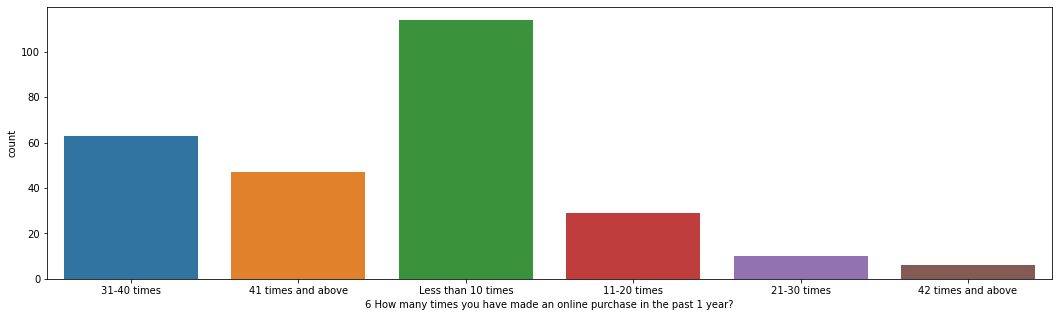

In [55]:
plt.figure(figsize=(18,5))
sns.countplot("6 How many times you have made an online purchase in the past 1 year?", data=df)

from this fig we came to know that maxm customers are shoping less than 10 times in past 1years

<AxesSubplot:xlabel='7 How do you access the internet while shopping on-line?', ylabel='count'>

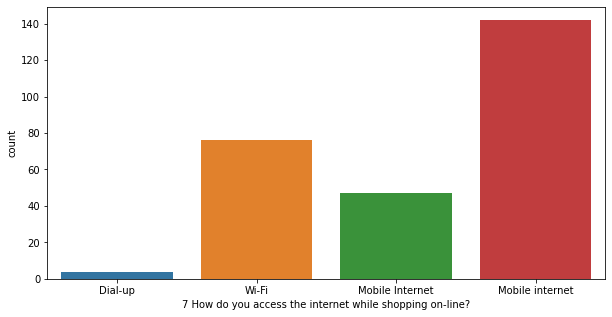

In [25]:
plt.figure(figsize=(10,5))
sns.countplot("7 How do you access the internet while shopping on-line?", data=df)

here we can see customers are used mobile internet for online shoping

<AxesSubplot:xlabel='8 Which device do you use to access the online shopping?', ylabel='count'>

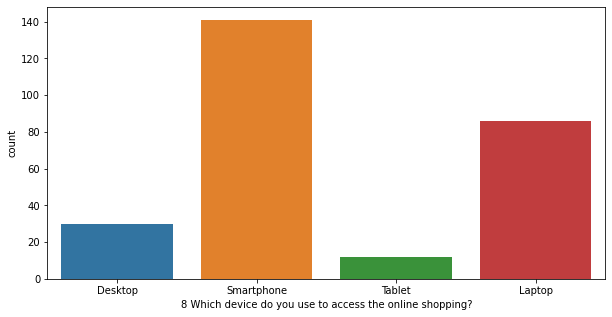

In [26]:
plt.figure(figsize=(10,5))
sns.countplot("8 Which device do you use to access the online shopping?", data=df)

maxm no of customers are used their smartphones for shoping

<AxesSubplot:xlabel='Longer time to get logged in (promotion, sales period)', ylabel='count'>

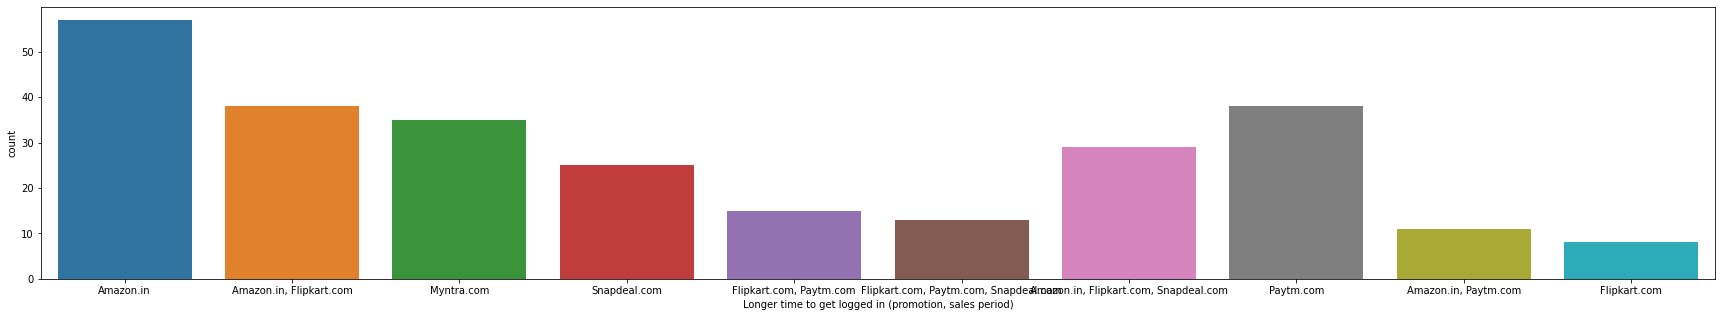

In [27]:
plt.figure(figsize=(30,5))
sns.countplot("Longer time to get logged in (promotion, sales period)", data=df)

<AxesSubplot:>

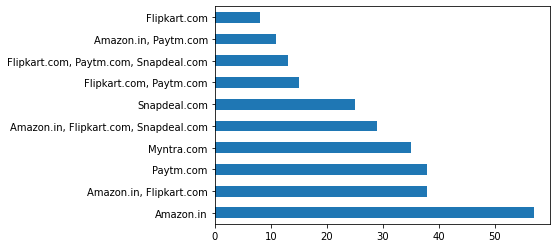

In [81]:
df["Longer time to get logged in (promotion, sales period)"].value_counts().plot(kind='barh')

amazon takes longer time to got logged in

<AxesSubplot:xlabel='Longer time in displaying graphics and photos (promotion, sales period)', ylabel='count'>

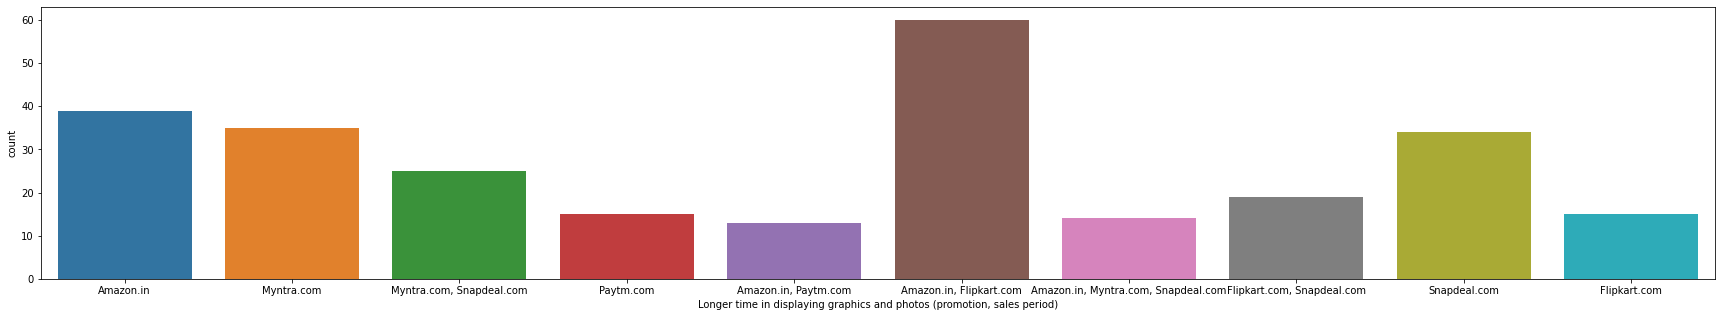

In [28]:
plt.figure(figsize=(30,5))
sns.countplot("Longer time in displaying graphics and photos (promotion, sales period)", data=df)

here we can see Amazon.in n flipkart.com has taken longer time to displying graphics and photos

<AxesSubplot:xlabel='Late declaration of price (promotion, sales period)', ylabel='count'>

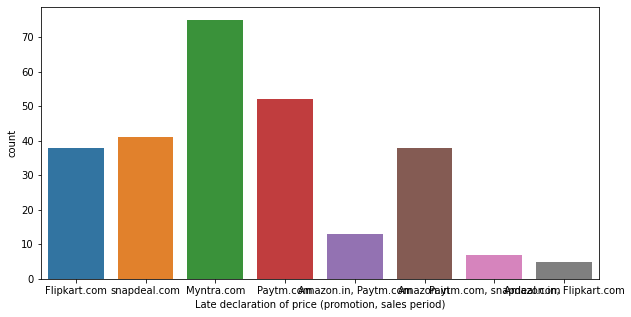

In [29]:
plt.figure(figsize=(10,5))
sns.countplot("Late declaration of price (promotion, sales period)", data=df)

here we can see  Myntra decare its price and sales time very late...which can impact on customers retension

<AxesSubplot:xlabel='Longer page loading time (promotion, sales period)', ylabel='count'>

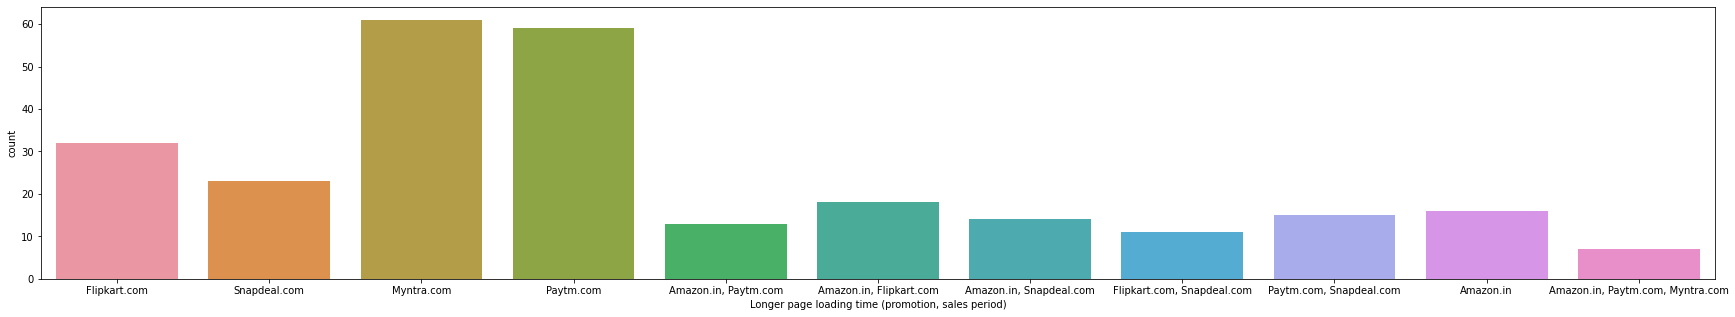

In [30]:
plt.figure(figsize=(30,5))
sns.countplot("Longer page loading time (promotion, sales period)", data=df)

Myntra and Paytm have take Longer page loading time as compare to others shoping portal

<AxesSubplot:xlabel='Limited mode of payment on most products (promotion, sales period)', ylabel='count'>

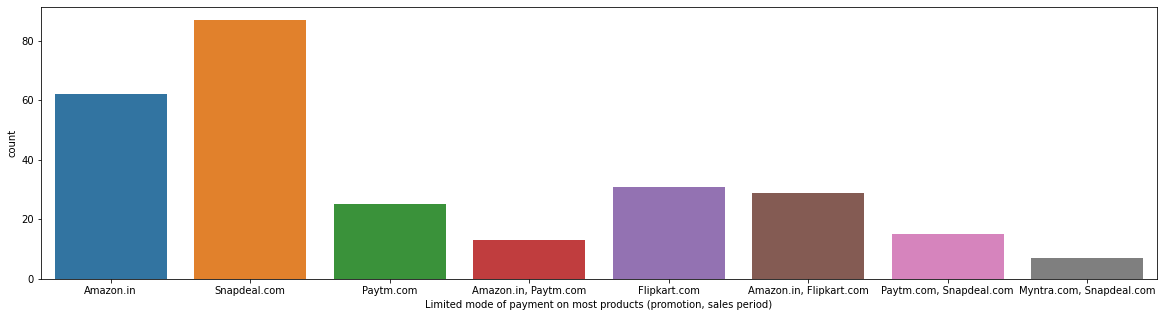

In [31]:
plt.figure(figsize=(20,5))
sns.countplot("Limited mode of payment on most products (promotion, sales period)", data=df)

snapdeal has very limited mode of payments...as we know maxm customers need more payments options.
so its really very imp for customer retention

<AxesSubplot:xlabel='Longer delivery period', ylabel='count'>

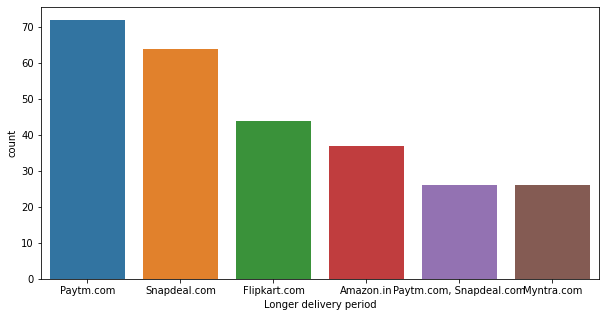

In [32]:
plt.figure(figsize=(10,5))
sns.countplot("Longer delivery period", data=df)

paytm and snapdeal takes much time to deliver a product...it is very important facter for customers

<AxesSubplot:xlabel='Change in website/Application design', ylabel='count'>

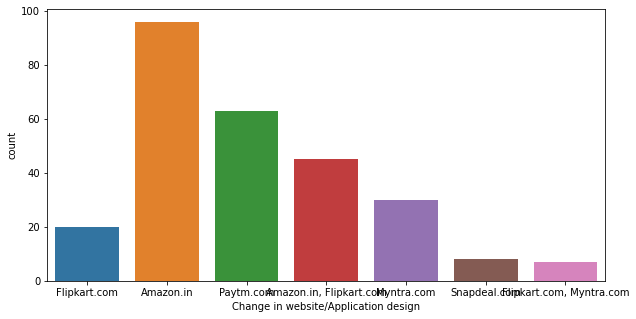

In [33]:
plt.figure(figsize=(10,5))
sns.countplot("Change in website/Application design", data=df)

amazon has changed there webite and application design maxm time as compare to others...which is really very good for customers

<AxesSubplot:xlabel='Website is as efficient as before', ylabel='count'>

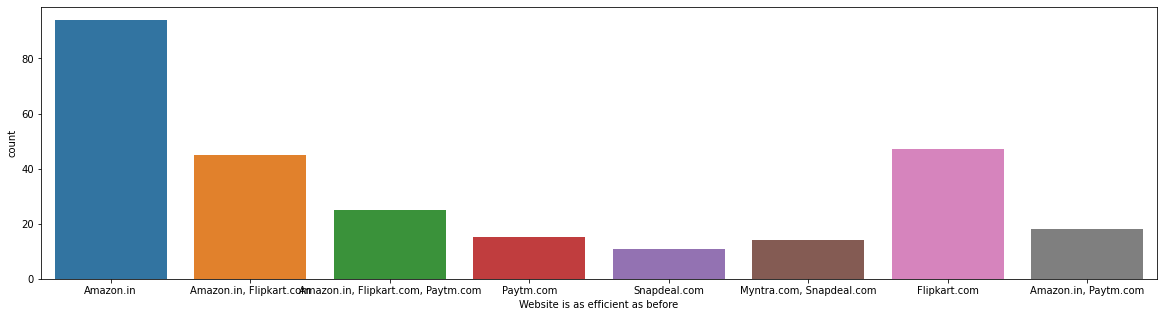

In [34]:
plt.figure(figsize=(20,5))
sns.countplot("Website is as efficient as before", data=df)

Amazon an flipkart are able to maintain their efficient as before...

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

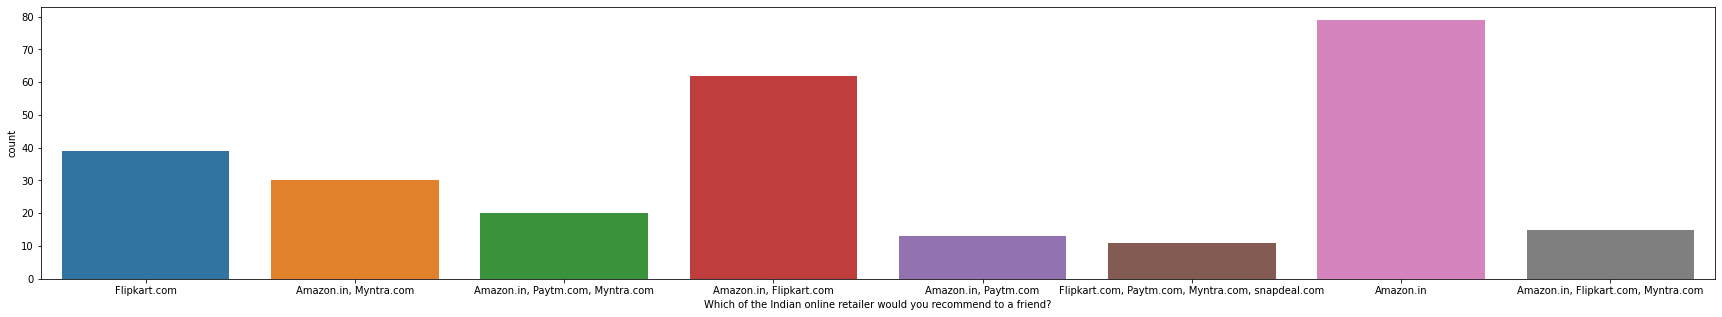

In [35]:
plt.figure(figsize=(30,5))
sns.countplot("Which of the Indian online retailer would you recommend to a friend?", data=df)

as we can see most customers are recommend to shop from amazon and flipkart accordingly...

<AxesSubplot:xlabel='24 User friendly Interface of the website', ylabel='count'>

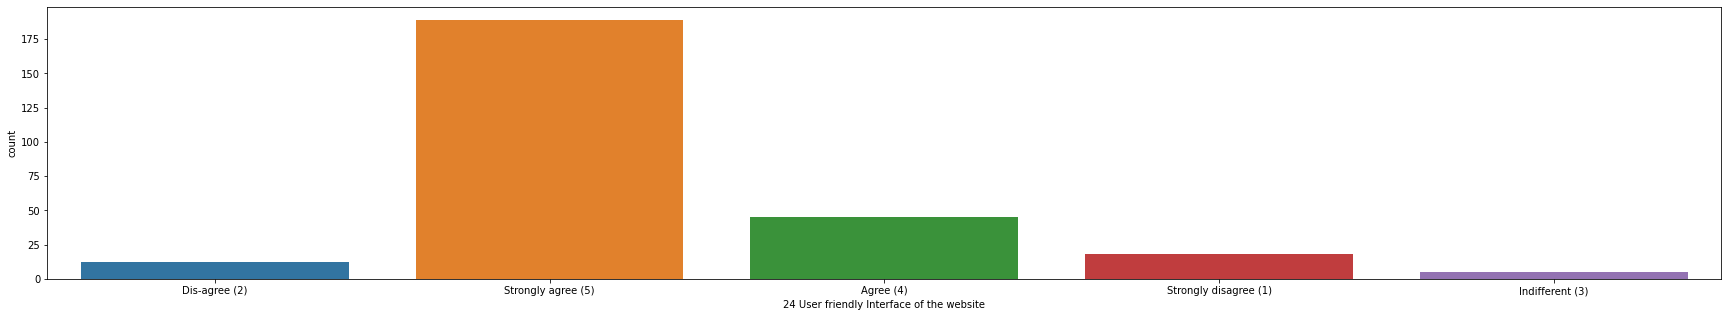

In [36]:
plt.figure(figsize=(30,5))
sns.countplot("24 User friendly Interface of the website", data=df)

maxm customers are strongly agree that online shoping sites are user fiendly interface

<AxesSubplot:xlabel='18 The content on the website must be easy to read and understand', ylabel='count'>

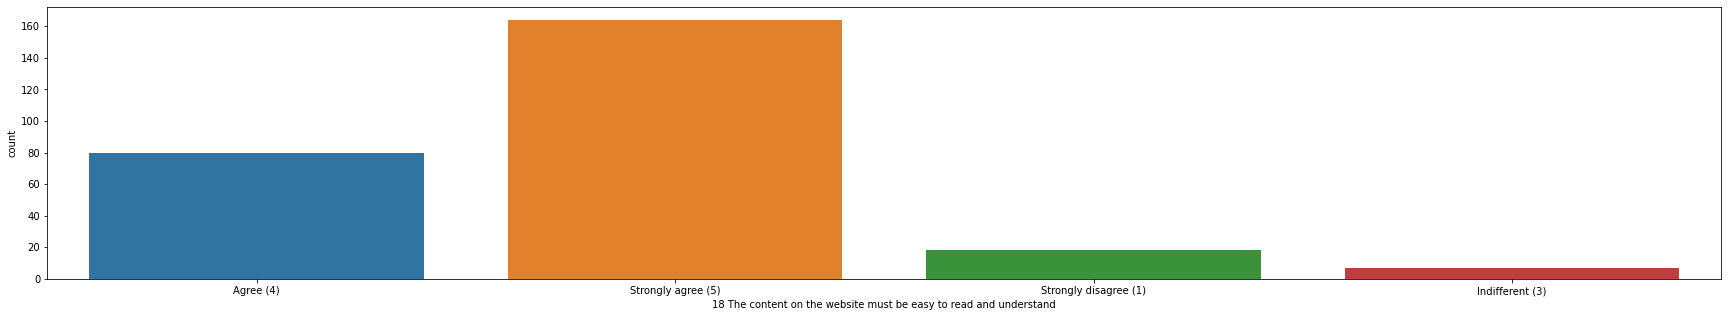

In [37]:
plt.figure(figsize=(30,5))
sns.countplot("18 The content on the website must be easy to read and understand", data=df)

as we can see almost all customers are agree that The content on the website must be easy to read and understand..

<AxesSubplot:xlabel='25 Convenient Payment methods', ylabel='count'>

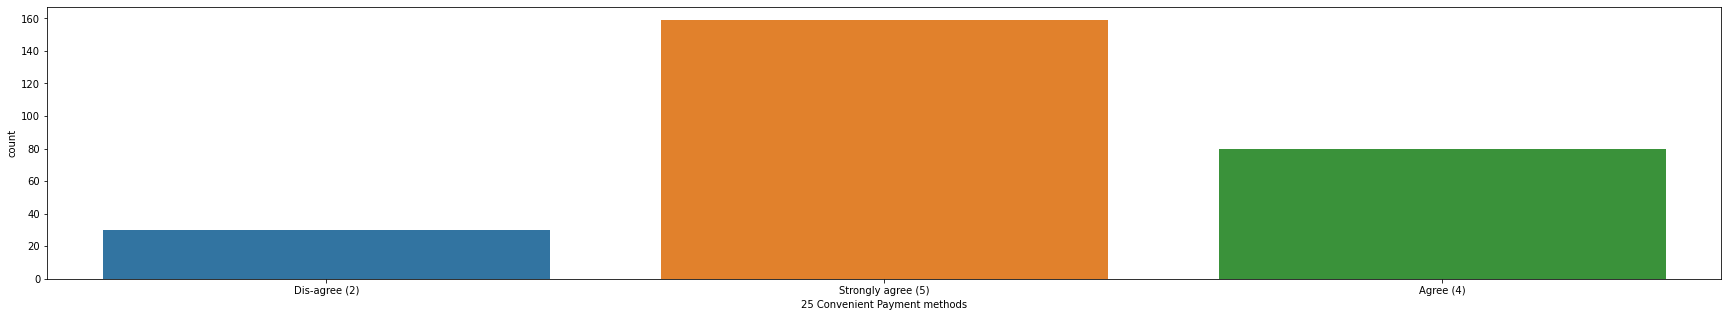

In [38]:
plt.figure(figsize=(30,5))
sns.countplot("25 Convenient Payment methods", data=df)

almost 90% customers thought the payment is Convenient methods

<AxesSubplot:xlabel='28 Being able to guarantee the privacy of the customer', ylabel='count'>

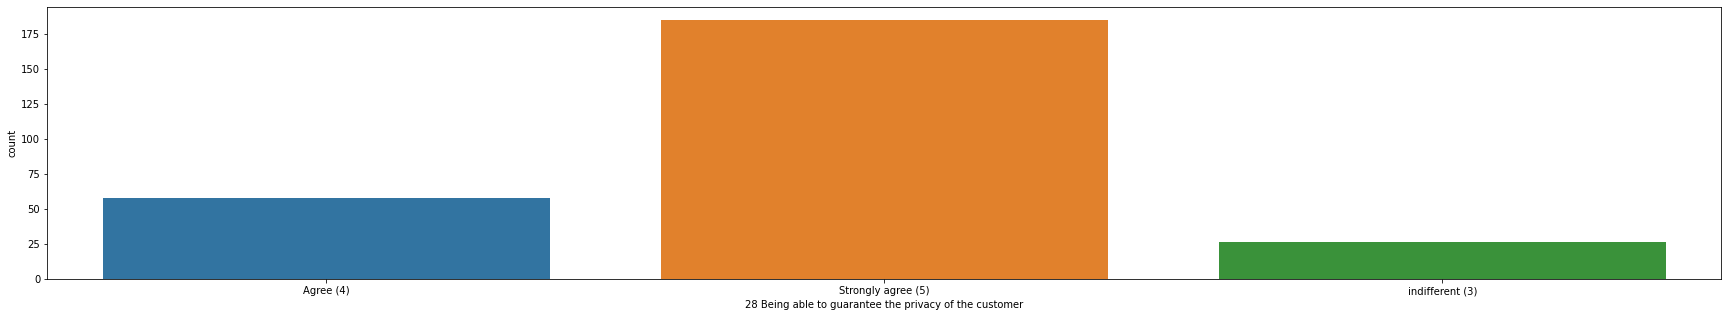

In [39]:
plt.figure(figsize=(30,5))
sns.countplot("28 Being able to guarantee the privacy of the customer", data=df)

more than 200 customers are agree and strongly agree that the sites are able to keep there customers privacy

<AxesSubplot:xlabel='30 Online shopping gives monetary benefit and discounts', ylabel='count'>

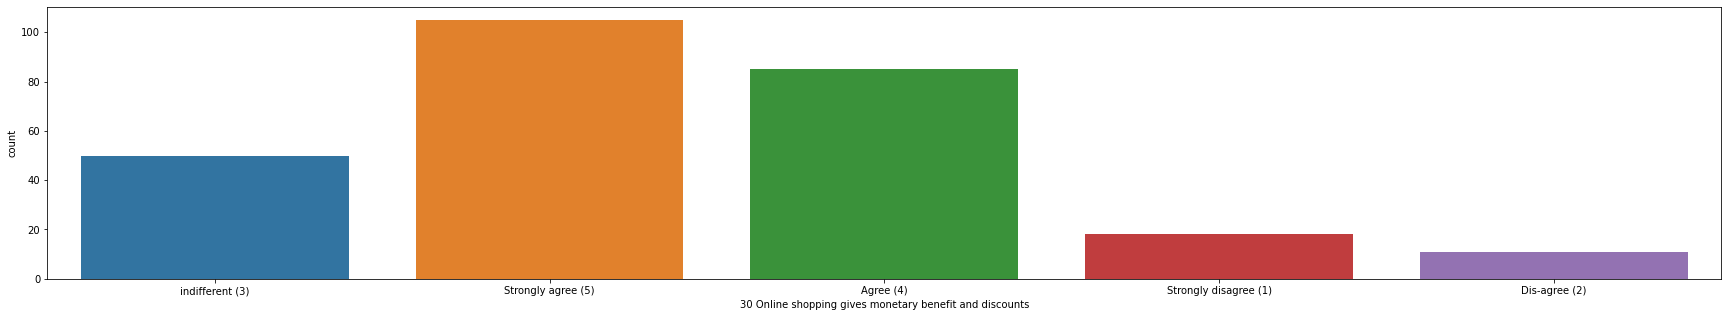

In [40]:
plt.figure(figsize=(30,5))
sns.countplot("30 Online shopping gives monetary benefit and discounts", data=df)

yes absolutely from above fig we can see almost 180 peoples are agree that Online shopping gives monetary benefit and discounts as compare to offline

<AxesSubplot:xlabel='33 Return and replacement policy of the e-tailer is important for purchase decision', ylabel='count'>

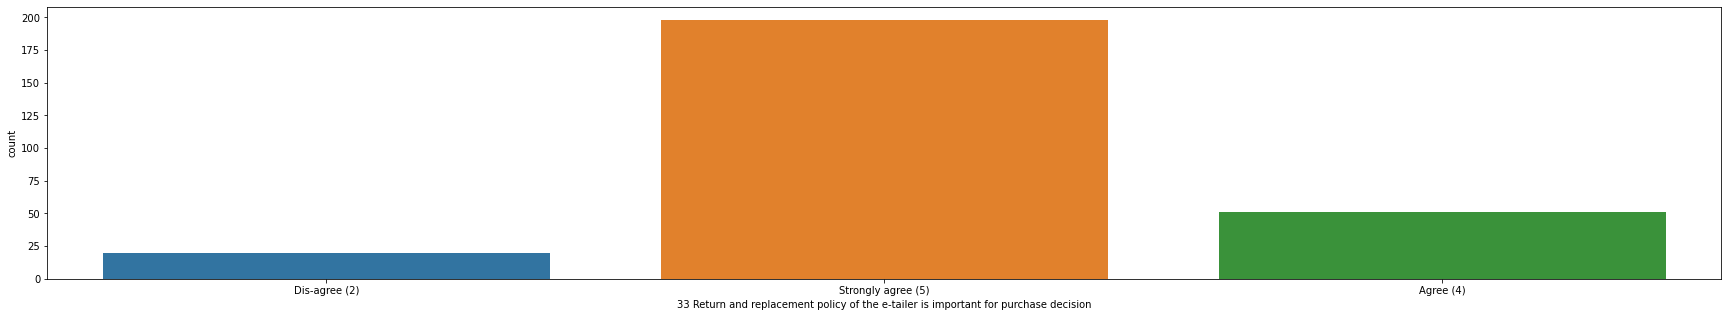

In [41]:
plt.figure(figsize=(30,5))
sns.countplot("33 Return and replacement policy of the e-tailer is important for purchase decision", data=df)

this is the most important parameter for customer retaintion...almost all customers thinks that Return and replacement policy takes a major role for a customers purchase decisions

<AxesSubplot:xlabel='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', ylabel='count'>

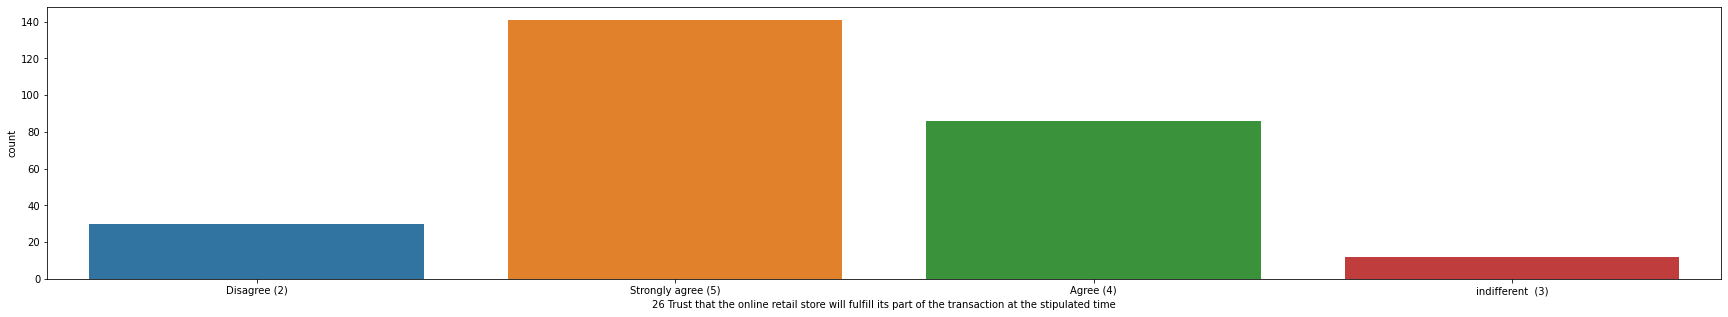

In [42]:
plt.figure(figsize=(30,5))
sns.countplot("26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time", data=df)

<AxesSubplot:xlabel='35 Displaying quality Information on the website improves satisfaction of customers', ylabel='count'>

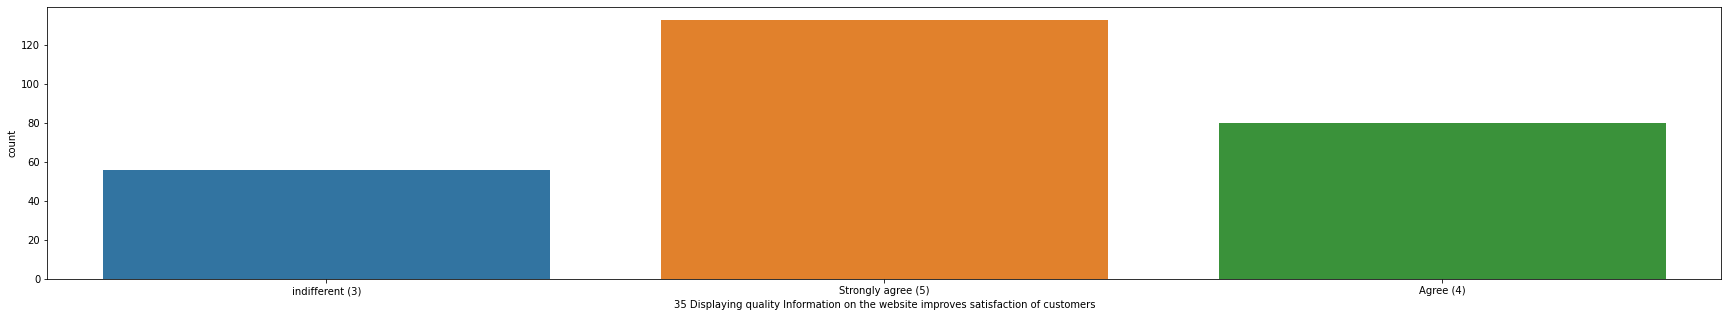

In [43]:
plt.figure(figsize=(30,5))
sns.countplot("35 Displaying quality Information on the website improves satisfaction of customers", data=df)

almost all customer thinks that Displaying quality Information on the website improves satisfaction of customers which is takes a major part for customer satisfication

<AxesSubplot:xlabel='39 Offering a wide variety of listed product in several category', ylabel='count'>

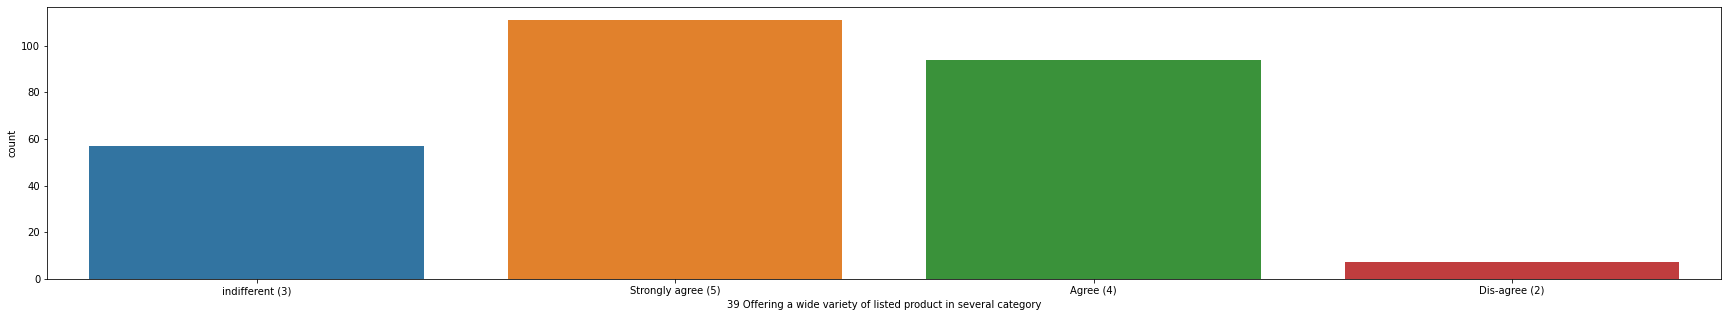

In [44]:
plt.figure(figsize=(30,5))
sns.countplot("39 Offering a wide variety of listed product in several category", data=df)

absolutely, customers mostly attracted towards where many no of veriety available in several catagory

<AxesSubplot:xlabel='41 Monetary savings', ylabel='count'>

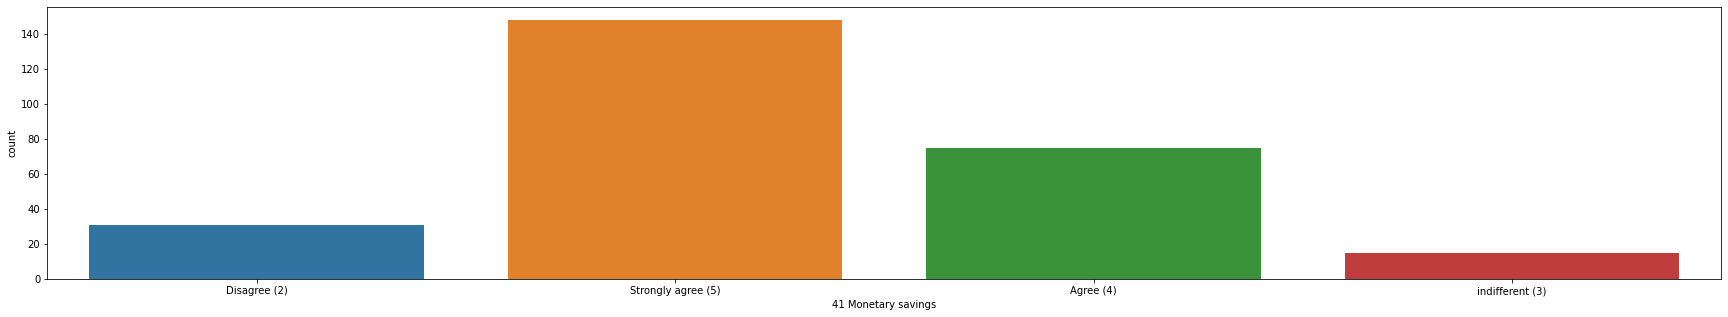

In [45]:
plt.figure(figsize=(30,5))
sns.countplot("41 Monetary savings", data=df)

in india mostly customers are running towards where they can save some money in same quality product....so yes most no of people strongly agree in it.

<AxesSubplot:xlabel='47 Getting value for money spent', ylabel='count'>

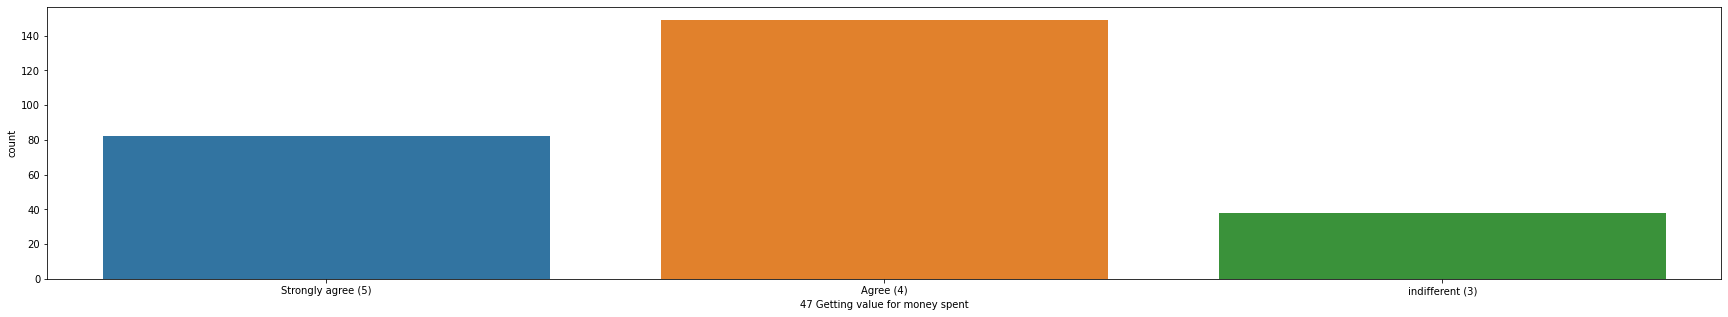

In [46]:
plt.figure(figsize=(30,5))
sns.countplot("47 Getting value for money spent", data=df)

from above fig we can clearly see that most no of customers thought they get their product for value for money

<AxesSubplot:xlabel='Easy to use website or application', ylabel='count'>

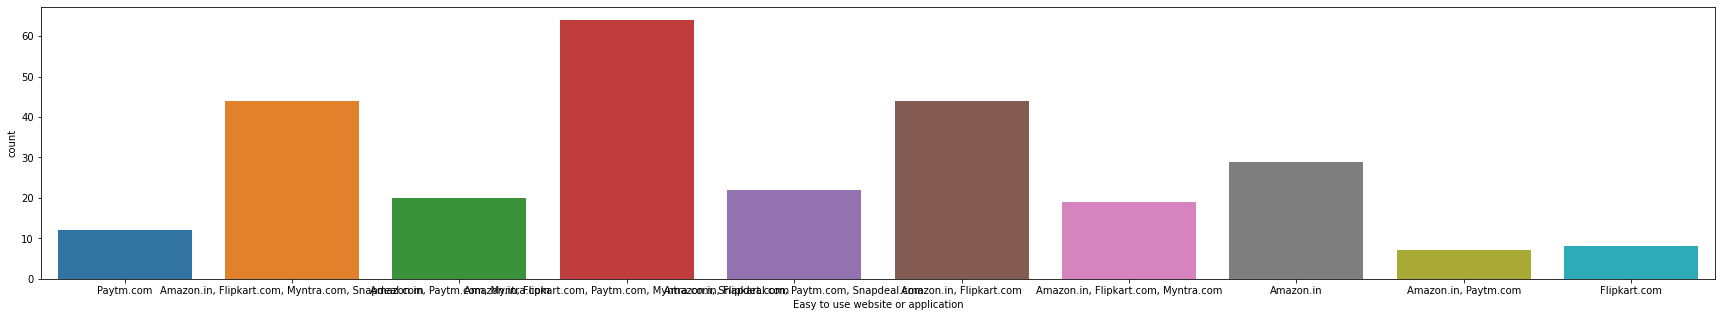

In [47]:
plt.figure(figsize=(30,5))
sns.countplot("Easy to use website or application", data=df)

<AxesSubplot:xlabel='Fast loading website speed of website and application', ylabel='count'>

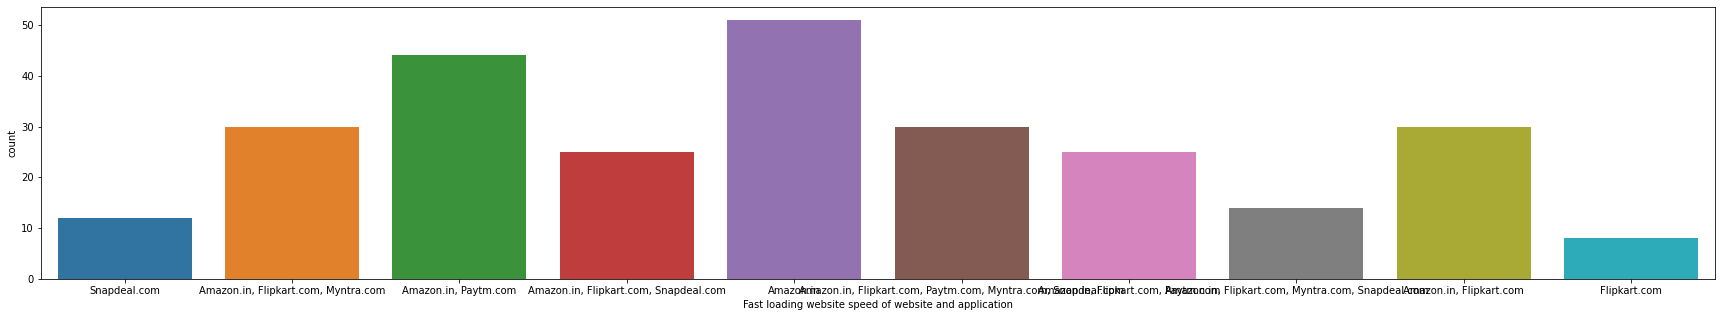

In [48]:
plt.figure(figsize=(30,5))
sns.countplot("Fast loading website speed of website and application", data=df)

these sites or applications have faster loading...

<AxesSubplot:xlabel='Speedy order delivery ', ylabel='count'>

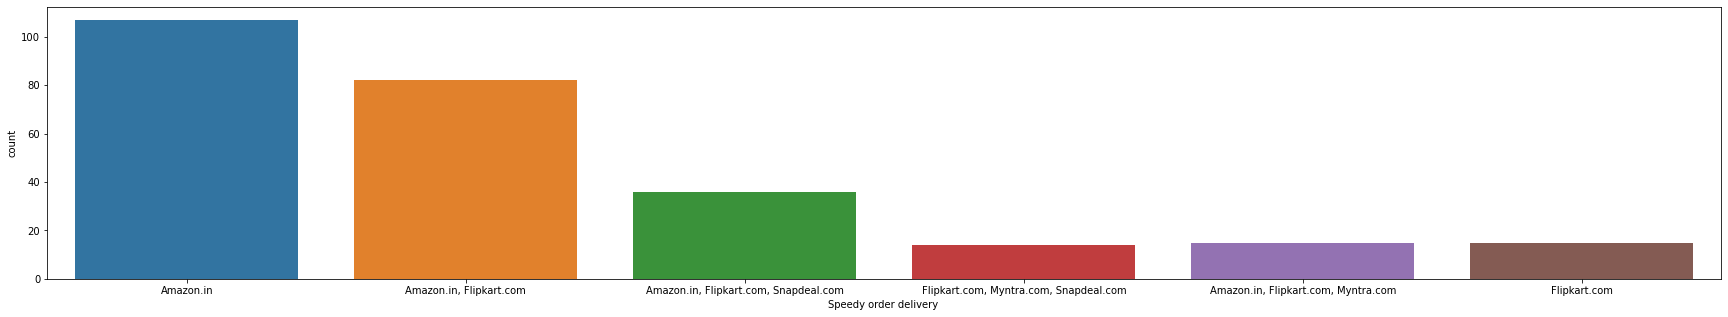

In [82]:
plt.figure(figsize=(30,5))
sns.countplot("Speedy order delivery ", data=df)

<AxesSubplot:>

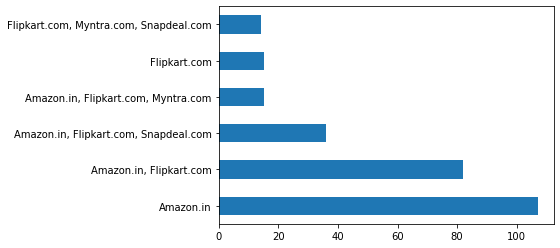

In [86]:
df["Speedy order delivery "].value_counts().plot(kind="barh")

almost all customers wants to get their product speedly....here also we can see there is  sites like amazon n flipkat are able to deliver there product speedly..
so its take a major role in customer retention

<AxesSubplot:xlabel='Longer time to get logged in (promotion, sales period)', ylabel='count'>

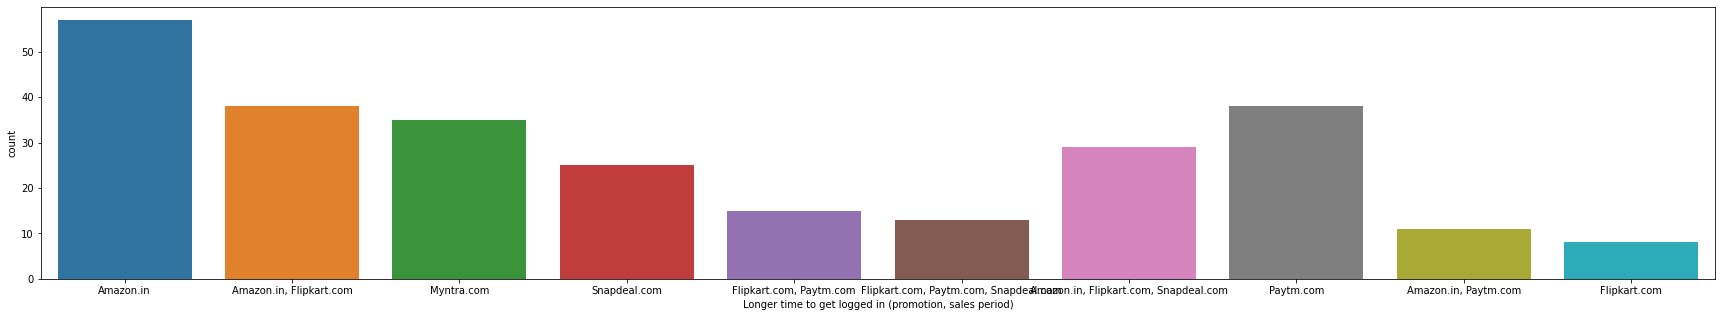

In [50]:
plt.figure(figsize=(30,5))
sns.countplot("Longer time to get logged in (promotion, sales period)", data=df)

<AxesSubplot:xlabel='Longer delivery period', ylabel='count'>

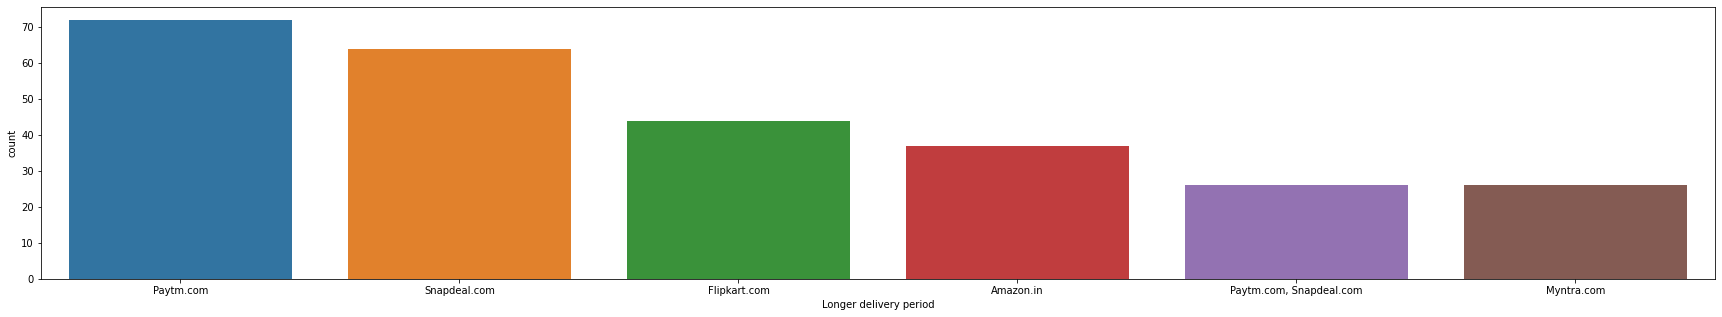

In [51]:
plt.figure(figsize=(30,5))
sns.countplot("Longer delivery period", data=df)

here we can see paytm and snapdeal takes much time to deliver a product to customers which is leads to loss customers...because almost all customers want to got deliver their product as soon as possible

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

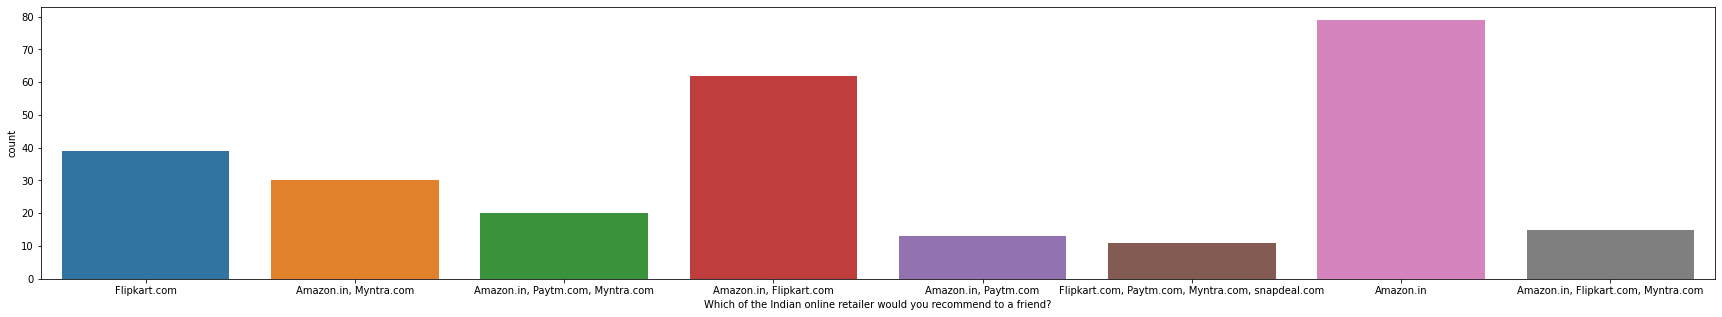

In [88]:
plt.figure(figsize=(30,5))
sns.countplot("Which of the Indian online retailer would you recommend to a friend?", data=df)

<AxesSubplot:>

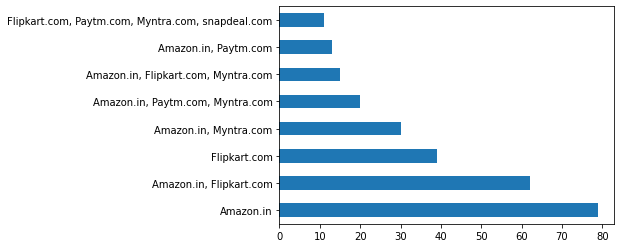

In [87]:
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts().plot(kind='barh')

as we can see in above figure most people or customer recomended Amazon and Flipkat and Myntra accordingly for online shoping